In [1]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [2]:
recgli = read.csv("../../ParseData/Parsing_REC_HGG_Oct2018/7thParse_researchPath_withInVivo.csv") 

In [3]:
#recgli[order(recgli$current_hist_type, recgli$t_number, recgli$tumor_cell_evaluation),]

In [4]:
recgli = recgli[recgli$tumor_cell_evaluation != "Ind",]
dim(recgli)
recgli = droplevels(recgli)
recgli$tumor_cell_evaluation = as.character(recgli$tumor_cell_evaluation)
recgli$tumor_cell_evaluation = as.numeric(recgli$tumor_cell_evaluation)
str(recgli$tumor_cell_evaluation)

[1] 192  71

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

 num [1:192] 3 2 2 3 1 1 2 0 0 0 ...


In [5]:
colnames(recgli)

[1] "b_number"                  "t_number"                 
 [3] "sf_number"                 "current_scan_date"        
 [5] "current_surgery_date"      "current_hist_grade"       
 [7] "current_hist_type"         "roi.label"                
 [9] "tumor_cell_evaluation"     "necrosis"                 
[11] "mv_hyperplasia"            "f8_delicate"              
[13] "f8_simple"                 "f8_complex"               
[15] "mib_1"                     "avgerage_cells"           
[17] "bx_pure_treatment_effect"  "percent_tumor_nuclei"     
[19] "nfse"                      "nfl"                      
[21] "nt1c"                      "nt1v"                     
[23] "nt1d"                      "nadc.1"                   
[25] "nfa.1"                     "nadc.2"                   
[27] "nfa.2"                     "phn_nlin"                 
[29] "cbvn_nlin"                 "recov_nlin"               
[31] "phn_npar"                  "recov_npar"               
[33] "recovn_npar"               "cni"                      
[35] "ccri"                      "crni"                     
[37] "ncho"                      "ncre"                     
[39] "nnaa"                      "nlip"                     
[41] "nlac"                      "laclip"                   
[43] "comments"                  "notes."                   
[45] "imaging_code"              "perf_quant"               
[47] "spec_quant"                "include_anat"             
[49] "include_diffu1000"         "include_diffu2000"        
[51] "include_diffu_all"         "include_perf"             
[53] "include_spec"              "include_one_advanced_mod" 
[55] "include_all_advanced_mods" "X.CEL"                    
[57] "X.NEL"                     "X.NEC"                    
[59] "sum"                       "in_CEL"                   
[61] "in_T2all"                  "in_NEL"                   
[63] "in_NEC"                    "in_ROI"                   
[65] "desired_hist"              "multnom_out"              
[67] "no_ffpe"                   "waiting_on_path"          
[69] "rhgg_txe_analysis"         "olddata"                  
[71] "newdata"

In [6]:
recgli.diffu = recgli[recgli$include_diffu_all==1,]
dim(recgli.diffu)

[1] 191  71

In [7]:
recgli = recgli.diffu

In [8]:
recgli$t_number = as.factor(recgli$t_number)
#str(recgli)

In [9]:
colSums(is.na(recgli))

b_number                  t_number                 sf_number 
                        0                         0                         0 
        current_scan_date      current_surgery_date        current_hist_grade 
                        0                         0                         0 
        current_hist_type                 roi.label     tumor_cell_evaluation 
                        0                         0                         6 
                 necrosis            mv_hyperplasia               f8_delicate 
                        0                         0                         0 
                f8_simple                f8_complex                     mib_1 
                        0                         0                         9 
           avgerage_cells  bx_pure_treatment_effect      percent_tumor_nuclei 
                       12                         0                         7 
                     nfse                       nfl                      nt1c 
                        0                         0                         0 
                     nt1v                      nt1d                    nadc.1 
                       21                        21                         0 
                    nfa.1                    nadc.2                     nfa.2 
                        0                         5                         5 
                 phn_nlin                 cbvn_nlin                recov_nlin 
                       60                        60                        60 
                 phn_npar                recov_npar               recovn_npar 
                       60                        60                        60 
                      cni                      ccri                      crni 
                       75                        75                        75 
                     ncho                      ncre                      nnaa 
                       75                        75                        75 
                     nlip                      nlac                    laclip 
                       75                        75                        75 
                 comments                    notes.              imaging_code 
                        0                       179                       191 
               perf_quant                spec_quant              include_anat 
                       60                        44                         0 
        include_diffu1000         include_diffu2000         include_diffu_all 
                        0                         0                         0 
             include_perf              include_spec  include_one_advanced_mod 
                        0                         0                         0 
include_all_advanced_mods                     X.CEL                     X.NEL 
                        0                        24                        16 
                    X.NEC                       sum                    in_CEL 
                      172                        14                         0 
                 in_T2all                    in_NEL                    in_NEC 
                        0                         0                         0 
                   in_ROI              desired_hist               multnom_out 
                        0                         0                         0 
                  no_ffpe           waiting_on_path         rhgg_txe_analysis 
                        0                         0                         0 
                  olddata                   newdata 
                        0                         0

In [11]:
table(!duplicated(recgli$t_number))


FALSE  TRUE 
  123    68 


# There are 191 samples with 68 patients

# Visualization: 

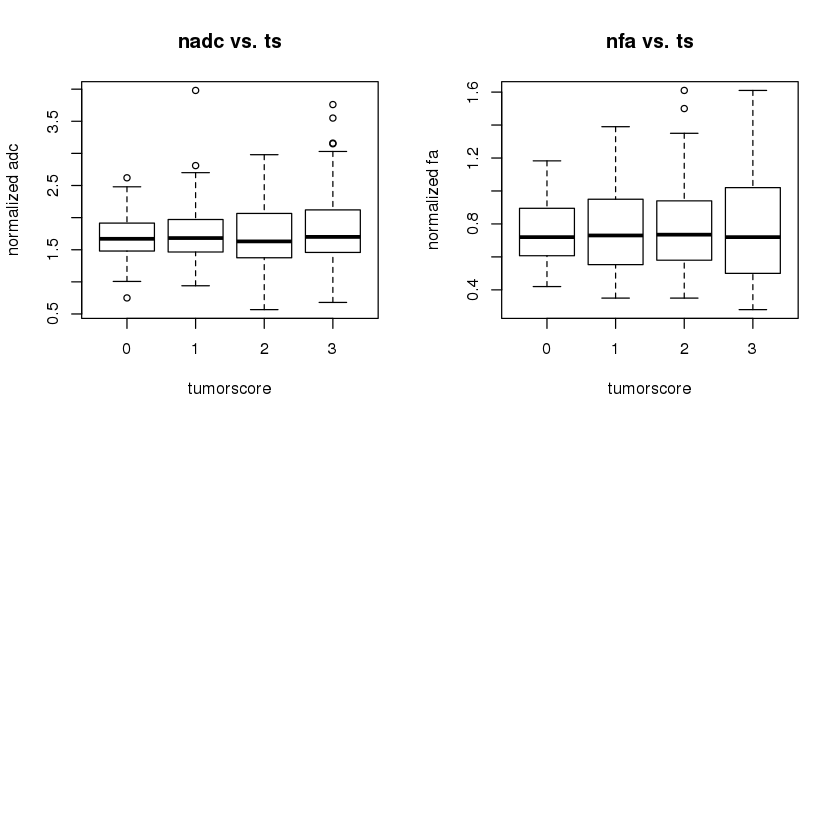

In [12]:
par(mfrow = c(2, 2))
a = boxplot(nadc.1 ~ tumor_cell_evaluation , data = recgli, ylab = "normalized adc", xlab = "tumorscore", main = 'nadc vs. ts')

b = boxplot(nfa.1 ~ tumor_cell_evaluation , data = recgli, ylab = "normalized fa", xlab = "tumorscore", main = 'nfa vs. ts')


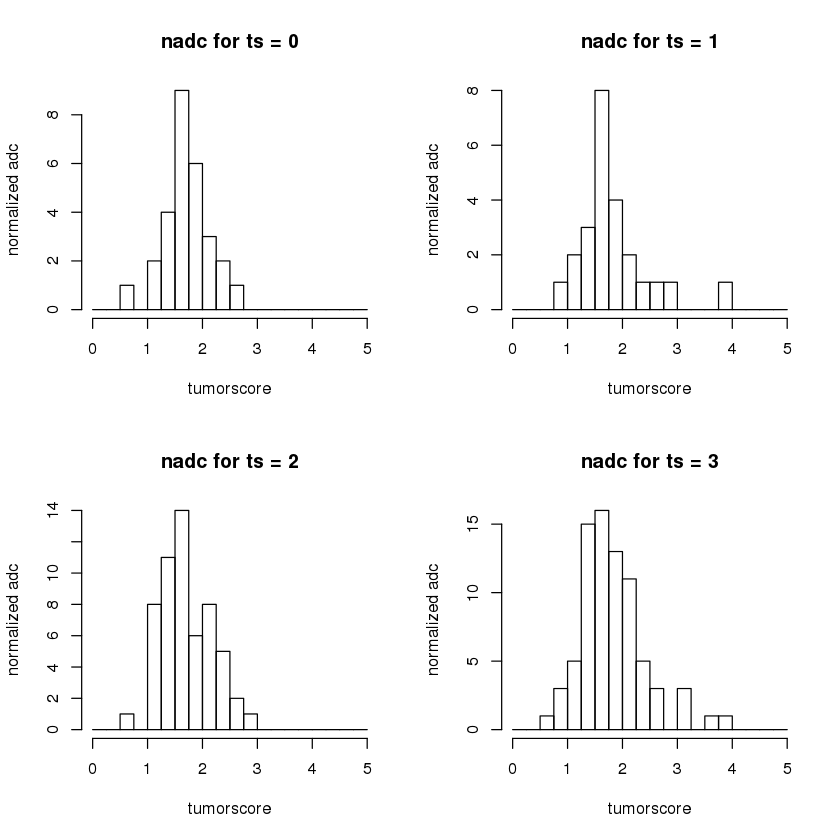

In [13]:
par(mfrow = c(2, 2))
a = hist(recgli[which(recgli$tumor_cell_evaluation==0),]$nadc.1, 
         ylab = "normalized adc", xlab = "tumorscore", 
         main = 'nadc for ts = 0', xlim=c(0,5), breaks = c(seq(0, 5, by = .25)))
a = hist(recgli[which(recgli$tumor_cell_evaluation==1),]$nadc.1, 
         ylab = "normalized adc", xlab = "tumorscore", 
         main = 'nadc for ts = 1', xlim = c(0,5), breaks = c(seq(0, 5, by = .25)))
a = hist(recgli[which(recgli$tumor_cell_evaluation==2),]$nadc.1, 
         ylab = "normalized adc", xlab = "tumorscore", 
         main = 'nadc for ts = 2', xlim = c(0,5), breaks = c(seq(0, 5, by = .25)))
a = hist(recgli[which(recgli$tumor_cell_evaluation==3),]$nadc.1, 
         ylab = "normalized adc", xlab = "tumorscore", 
         main = 'nadc for ts = 3', xlim = c(0,5), breaks = c(seq(0, 5, by = .25)))

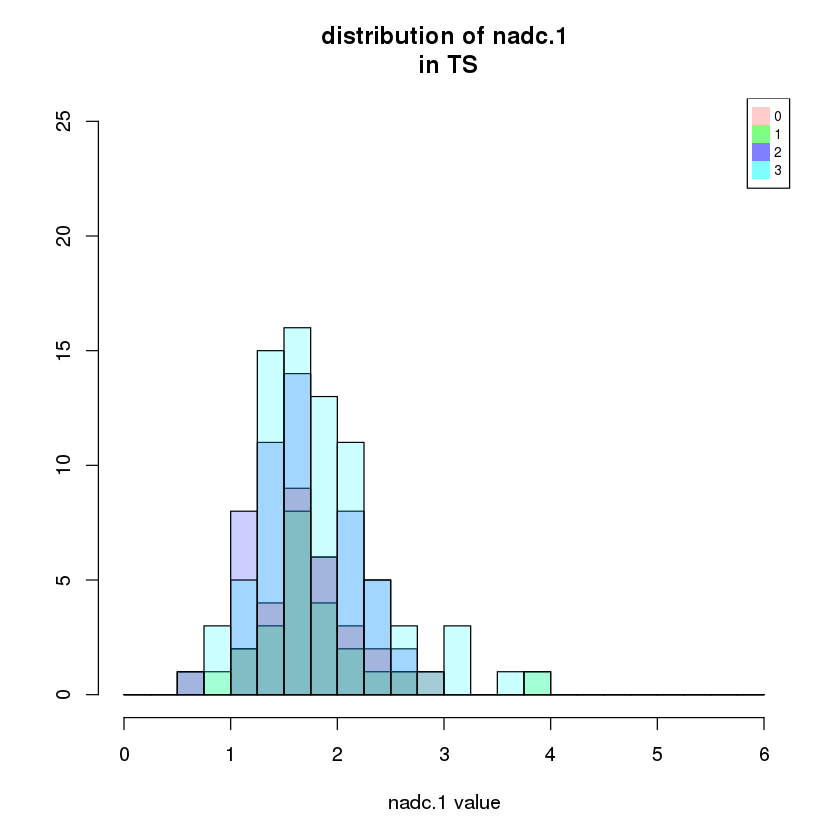

In [14]:
par(mfrow=c(1,1))

hist(recgli[which(recgli$tumor_cell_evaluation==0 ),]$nadc.1, breaks=seq(from = 0, to = 6, by = .25), ylim = c(0, 25),  xlim=c(0,6), col=rgb(1,0,0,0.2), xlab="nadc.1 value", 
     ylab="", main="distribution of nadc.1\n in TS")
hist(recgli[which(recgli$tumor_cell_evaluation==1 ),]$nadc.1, breaks=seq(from = 0, to = 6, by = .25), ylim = c(0, 25),  xlim=c(0,6), col=rgb(0,1,0,0.2), add=T)
hist(recgli[which(recgli$tumor_cell_evaluation==2 ),]$nadc.1, breaks=seq(from = 0, to = 6, by = .25), ylim = c(0, 25),  xlim=c(0,6), col=rgb(0,0,1,0.2), add=T)
hist(recgli[which(recgli$tumor_cell_evaluation==3 ),]$nadc.1, breaks=seq(from = 0, to = 6, by = .25), ylim = c(0, 25),  xlim=c(0,6), col=rgb(0,1,1,0.2), add=T)
legend("topright", legend=c("0","1", "2", "3"), col=c(rgb(1,0,0,0.2), 
     rgb(0,1,0,0.5), rgb(0,0,1,0.5), rgb(0,1,1,0.5)), pt.cex=2, pch=15, cex = .7 )

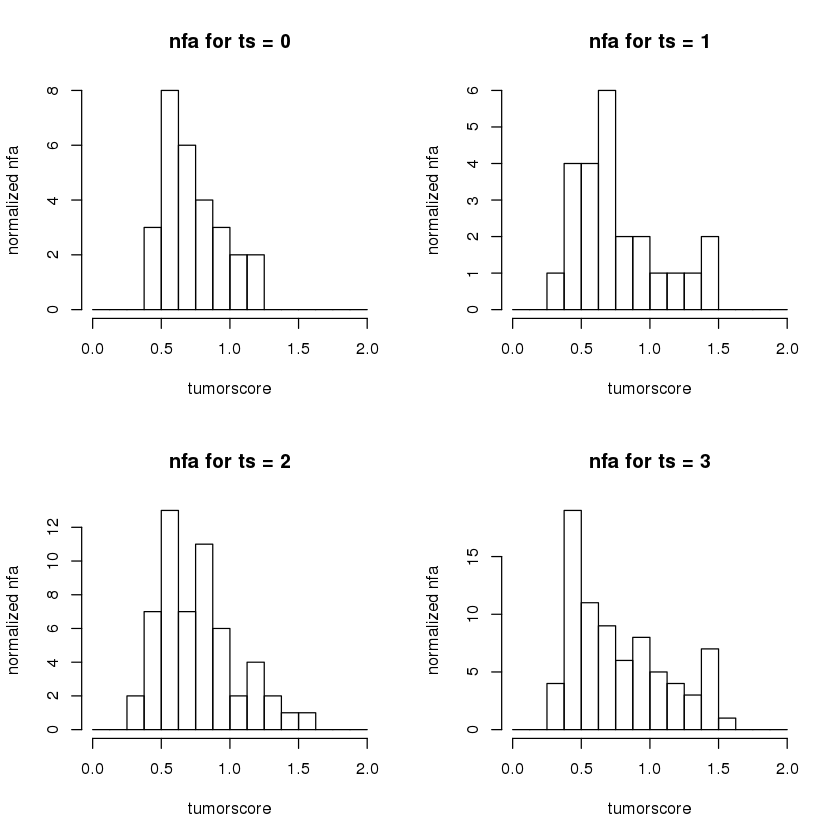

In [15]:
par(mfrow = c(2, 2))
a = hist(recgli[which(recgli$tumor_cell_evaluation==0),]$nfa.1, 
         ylab = "normalized nfa", xlab = "tumorscore", 
         main = 'nfa for ts = 0', xlim=c(0,2), breaks = c(seq(0, 2, by = .125)))
a = hist(recgli[which(recgli$tumor_cell_evaluation==1),]$nfa.1, 
         ylab = "normalized nfa", xlab = "tumorscore", 
         main = 'nfa for ts = 1', xlim = c(0,2), breaks = c(seq(0, 2, by = .125)))
a = hist(recgli[which(recgli$tumor_cell_evaluation==2),]$nfa.1, 
         ylab = "normalized nfa", xlab = "tumorscore", 
         main = 'nfa for ts = 2', xlim = c(0,2), breaks = c(seq(0, 2, by = .125)))
a = hist(recgli[which(recgli$tumor_cell_evaluation==3),]$nfa.1, 
         ylab = "normalized nfa", xlab = "tumorscore", 
         main = 'nfa for ts = 3', xlim = c(0,2), breaks = c(seq(0, 2, by = .125)))

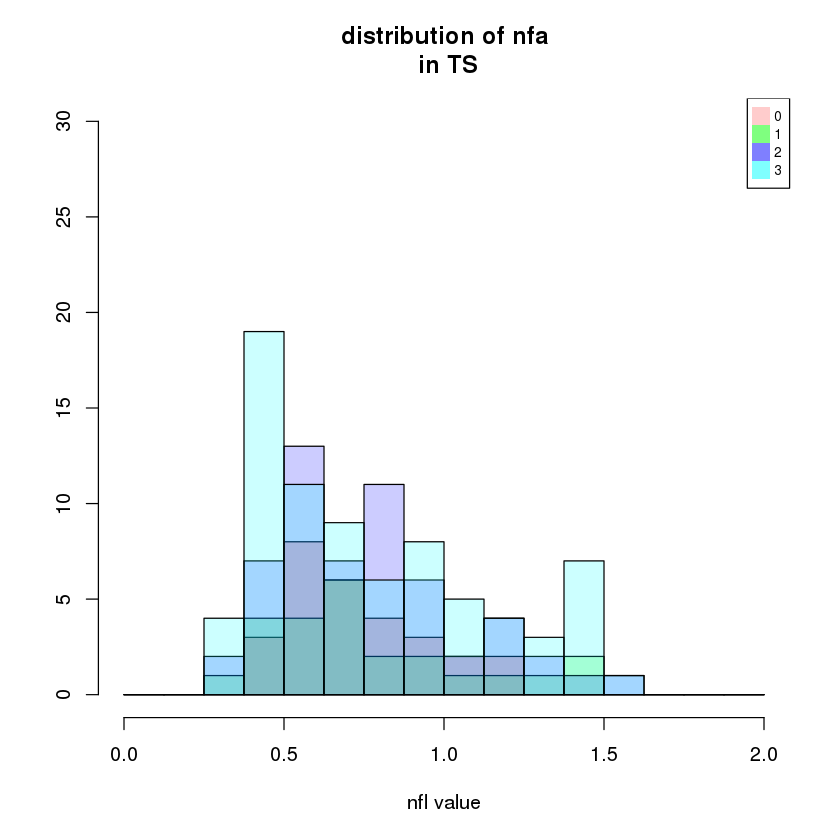

In [16]:
par(mfrow=c(1,1))

hist(recgli[which(recgli$tumor_cell_evaluation==0 ),]$nfa.1, breaks=seq(from = 0, to = 2, by = .125), ylim = c(0, 30),  xlim=c(0,2), col=rgb(1,0,0,0.2), xlab="nfl value", 
     ylab="", main="distribution of nfa\n in TS")
hist(recgli[which(recgli$tumor_cell_evaluation==1 ),]$nfa.1, breaks=seq(from = 0, to = 2, by = .125), ylim = c(0, 30),  xlim=c(0,2), col=rgb(0,1,0,0.2), add=T)
hist(recgli[which(recgli$tumor_cell_evaluation==2 ),]$nfa.1, breaks=seq(from = 0, to = 2, by = .125), ylim = c(0, 30),  xlim=c(0,2), col=rgb(0,0,1,0.2), add=T)
hist(recgli[which(recgli$tumor_cell_evaluation==3 ),]$nfa.1, breaks=seq(from = 0, to = 2, by = .125), ylim = c(0, 30),  xlim=c(0,2), col=rgb(0,1,1,0.2), add=T)
legend("topright", legend=c("0","1", "2", "3"), col=c(rgb(1,0,0,0.2), 
     rgb(0,1,0,0.5), rgb(0,0,1,0.5), rgb(0,1,1,0.5)), pt.cex=2, pch=15, cex = .7 )

# Statistics: 

 Use GLMM associate anatomical parameters with TS, no separation 

In [17]:
library(mlogit)

Loading required package: Formula
Loading required package: maxLik
Loading required package: miscTools

Please cite the 'maxLik' package as:
Henningsen, Arne and Toomet, Ott (2011). maxLik: A package for maximum likelihood estimation in R. Computational Statistics 26(3), 443-458. DOI 10.1007/s00180-010-0217-1.

If you have questions, suggestions, or comments regarding the 'maxLik' package, please use a forum or 'tracker' at maxLik's R-Forge site:
https://r-forge.r-project.org/projects/maxlik/


In [18]:
data_mlog <-mlogit.data(recgli,  id.var ="t_number", shape="wide", 
                        sep="", varying=NULL, 
                       choice = "tumor_cell_evaluation")

In [19]:
mlogit_nadc <- mlogit(tumor_cell_evaluation ~1 | nadc.1, data=data_mlog)
summary(mlogit_nadc)$CoefTable

,Estimate,Std. Error,z-value,Pr(>|z|)
1:(intercept),-1.052494861,0.9639114,-1.091900030,0.2748770
2:(intercept),0.688379486,0.8167662,0.842810904,0.3993342
3:(intercept),0.330477366,0.7766182,0.425533919,0.6704475
1:nadc.1,0.506053137,0.5197217,0.973700270,0.3302054
2:nadc.1,0.002797323,0.4592812,0.006090654,0.9951404
3:nadc.1,0.387515795,0.4301391,0.900908063,0.3676372


In [20]:
## univariate analysis: 
mlogit_nfa <- mlogit(tumor_cell_evaluation ~1 | nfa.1, data=data_mlog)
summary(mlogit_nfa)$CoefTable

,Estimate,Std. Error,z-value,Pr(>|z|)
1:(intercept),-0.3466314,0.7713265,-0.4493965,0.6531457
2:(intercept),0.4191285,0.6422978,0.6525454,0.5140494
3:(intercept),0.6361836,0.6129833,1.0378482,0.2993407
1:nfa.1,0.2536517,0.9471935,0.2677930,0.7888587
2:nfa.1,0.3589220,0.7904173,0.4540918,0.6497628
3:nfa.1,0.4880403,0.7536088,0.6476042,0.5172409


Use GEE to associate anatomical parameters with TS, no separation

In [21]:
library(multgee)

Loading required package: gnm
Loading required package: VGAM
Loading required package: stats4
Loading required package: splines

Attaching package: ‘VGAM’

The following object is masked from ‘package:mlogit’:

    lrtest



In [22]:
nadc.fit = ordLORgee(formula = tumor_cell_evaluation ~ nadc.1, link = "logit", 
                      id = t_number, data = recgli, LORstr = "category.exch")
summary(nadc.fit)$coefficients

,Estimate,san.se,san.z,Pr(>|san.z|)
beta10,-1.17496,0.52730,-2.22824,0.02586
beta20,-0.45135,0.48934,-0.92238,0.35633
beta30,0.81987,0.51829,1.58188,0.11368
nadc.1,-0.24644,0.25188,-0.97839,0.32788


In [23]:
nfa.fit = ordLORgee(formula = tumor_cell_evaluation ~ nfa.1, link = "logit", 
                      id = t_number, data = recgli, LORstr = "category.exch")
summary(nfa.fit)$coefficients

Warning message in fitLORgee(Y, X_mat, coeffs, ncategories, id, repeated, offset, :
“'Naive' covariance matrix is not positive definite”

,Estimate,san.se,san.z,Pr(>|san.z|)
beta10,-1.61744,0.26755,-6.04528,0.00000
beta20,-0.94981,0.20771,-4.57272,0.00000
beta30,0.38395,0.19495,1.96951,0.04889
nfa.1,0.03194,0.00842,3.79542,0.00015


Using RM ANOVA to use imaging characteristics as the dependent variable, and the TS as independent variable 

In [24]:
nadc.rmaov = aov(nadc.1 ~ tumor_cell_evaluation + Error(t_number/(tumor_cell_evaluation)), data=recgli)
summary(nadc.rmaov)

Warning message in aov(nadc.1 ~ tumor_cell_evaluation + Error(t_number/(tumor_cell_evaluation)), :
“Error() model is singular”


Error: t_number
                      Df Sum Sq Mean Sq F value Pr(>F)
tumor_cell_evaluation  1   0.02  0.0246   0.049  0.826
Residuals             65  32.80  0.5046               

Error: t_number:tumor_cell_evaluation
                      Df Sum Sq Mean Sq F value Pr(>F)
tumor_cell_evaluation  1  0.127  0.1273   0.457  0.503
Residuals             37 10.316  0.2788               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 80  10.62  0.1327               

In [25]:
nfa.rmaov = aov(nfa.1 ~ tumor_cell_evaluation + Error(t_number/(tumor_cell_evaluation)), data=recgli)
summary(nfa.rmaov)

Warning message in aov(nfa.1 ~ tumor_cell_evaluation + Error(t_number/(tumor_cell_evaluation)), :
“Error() model is singular”


Error: t_number
                      Df Sum Sq Mean Sq F value Pr(>F)
tumor_cell_evaluation  1  0.151  0.1513   0.895  0.348
Residuals             65 10.982  0.1690               

Error: t_number:tumor_cell_evaluation
                      Df Sum Sq Mean Sq F value Pr(>F)
tumor_cell_evaluation  1 0.0292 0.02915   0.578  0.452
Residuals             37 1.8650 0.05041               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 80  3.808  0.0476               